### Load the CSV file, save it as npy file and then visualize the brain slices

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import genfromtxt
import numpy as np
import tensorflow as tf

In [32]:
my_data = genfromtxt('5710.csv', delimiter=',')

In [33]:
my_data.shape

(640, 32768)

In [34]:
reshaped = np.reshape(my_data,(640,64,64,8))

In [35]:
reshaped.shape

(640, 64, 64, 8)

In [36]:
np.save('05710-image.npy', reshaped)

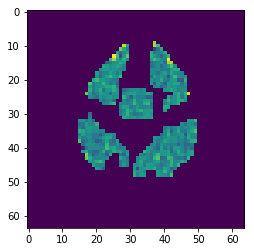

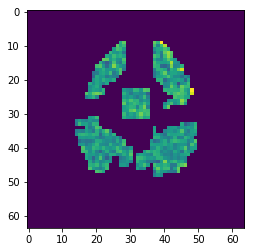

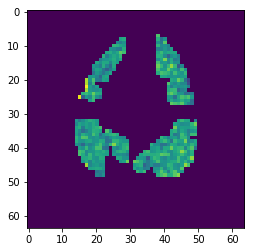

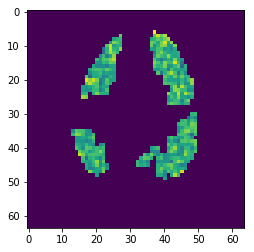

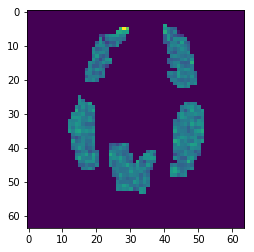

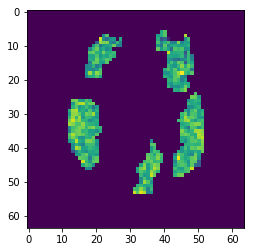

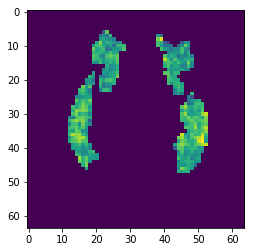

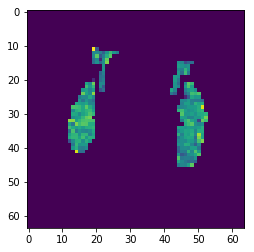

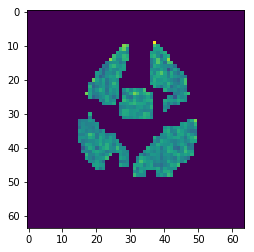

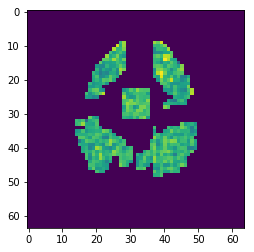

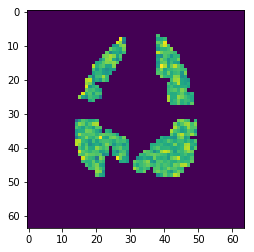

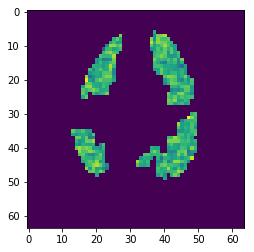

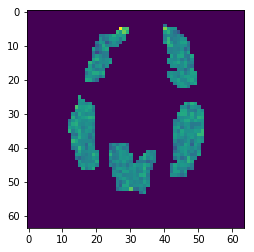

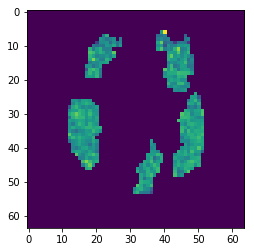

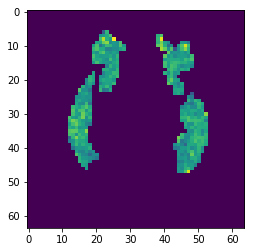

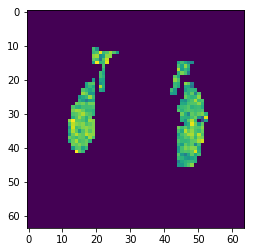

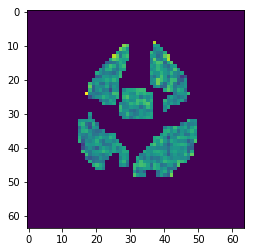

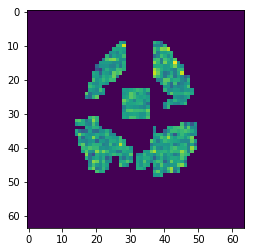

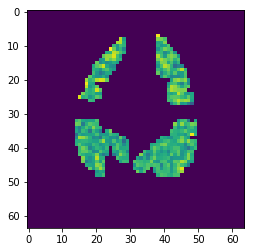

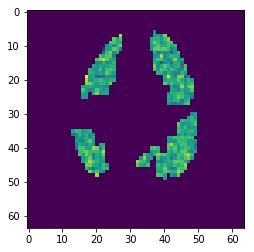

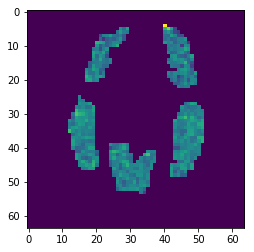

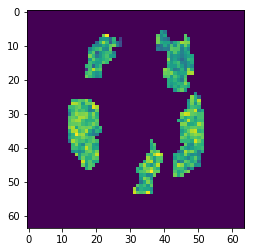

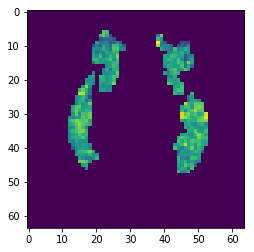

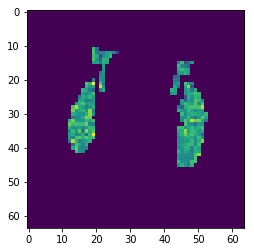

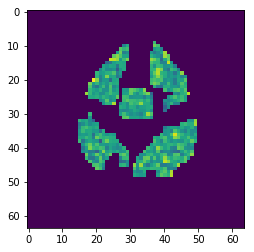

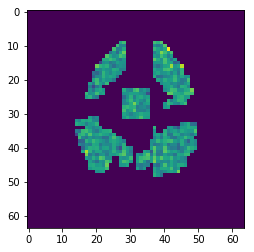

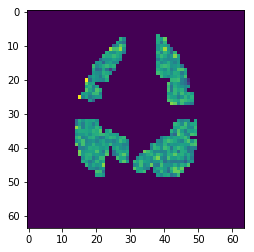

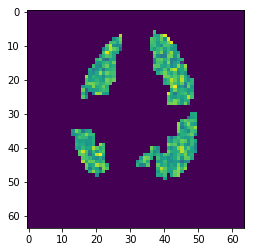

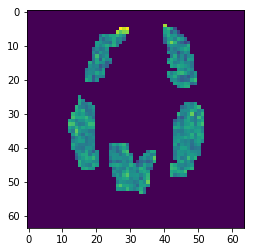

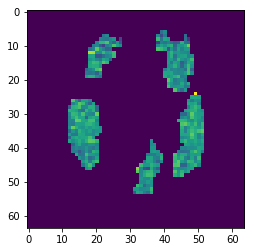

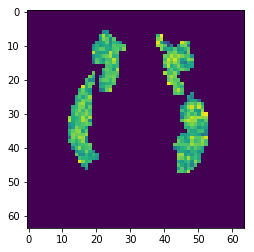

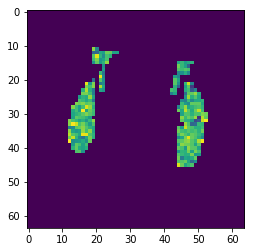

In [39]:
for j in range(4):
    for i in range(8): 
        plt.show(plt.imshow(reshaped[j,:,:,i]))

### Label generation part and getting one hot encoded values

In [37]:
labels = np.array(([0] * 8 + [1] * 8) * 20 + ([1] * 8 + [0] * 8) * 20)

In [91]:
def one_hot(labels):
    n_values = np.max(labels)
    return np.eye(n_values)[labels-1]

In [89]:
one_hot_labels = one_hot(labels+1) # The +1 part is a hack to get around array indexing problem

In [92]:
one_hot_labels[200:210] #sanity check from some random slice

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [93]:
np.sum(labels == np.argmax(one_hot_labels, axis=1)) #sanity check

640

In [100]:
np.save('04799-label-onehot.npy', one_hot_labels)